In [2]:
#Wrangling
import pandas as pd
import numpy as np

#Visualizing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Getting the zillow data in shape
import wrangle_zillow

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

Zillow
Create a python script or jupyter notebook named explore_zillow that does the following:
1)Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.
2)Plot a correlation matrix heatmap.
3)Plot latitude agains longitude.
4)Create a useable plot with 4 dimensions, e.g. x, y, color, size.
5)Compute the mean(logerror) by zipcode and the overall mean(logerror). 6)Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.
Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [3]:
#import our cleaned up data
df_zillow=wrangle_zillow.wrangle_zillow_data()
df_zillow.head()

AttributeError: module 'wrangle_zillow' has no attribute 'wrangle_zillow_data'

In [ ]:
#before we start graphing we need to change the fips,regionidcity,regionidcounty,regionidzip
#and censustractandblock into categorical variables
df_zillow.info()

In [ ]:
#We dropped all the Ventura County properties based on our previous criteria
for col in ['fips', 'regionidcity', 'regionidcounty', 'regionidzip','censustractandblock']:
    df_zillow[col] = df_zillow[col].astype('object')[:-1]
df_zillow.fips.unique()    

In [ ]:
#Change the fips to the corresponding county name
df_zillow['fips']=df_zillow[['fips']].replace({6037.0:'Los_Angeles_County',6059.0:'Orange_County'})

In [ ]:
df_zillow.fips.unique()

1)Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

In [4]:
num_cols=list(df_zillow.select_dtypes('number'))
num_cols.remove('longitude')
num_cols.remove('latitude')

NameError: name 'df_zillow' is not defined

In [5]:
sns.pairplot(df_zillow[num_cols])
plt.show()

NameError: name 'df_zillow' is not defined

2)Plot a correlation matrix heatmap.

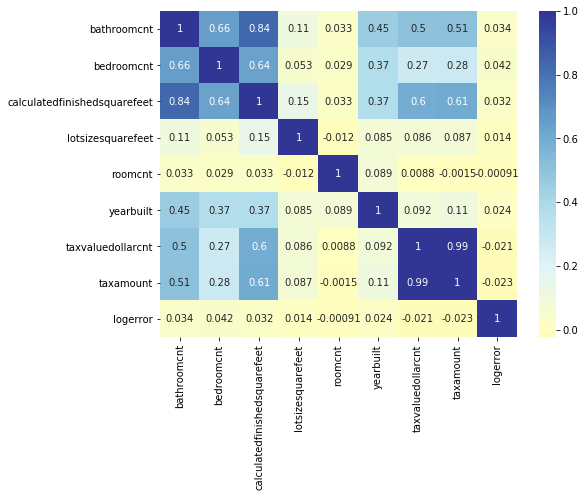

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df_zillow[num_cols].corr(), cmap='RdYlBu', annot=True, center=0)

3)Plot latitude against longitude.

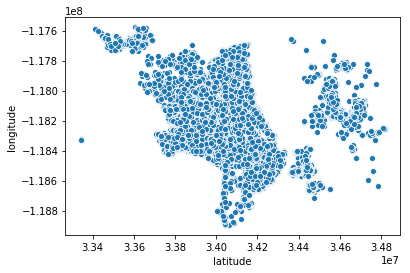

In [10]:
sns.scatterplot(x='latitude',y='longitude',data=df_zillow)
plt.show()

4)Create a useable plot with 4 dimensions, e.g. x, y, color, size.

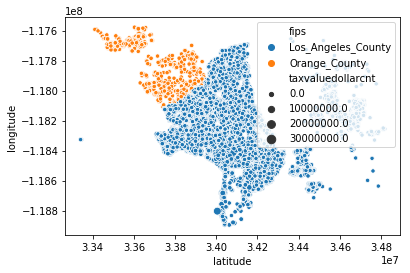

In [11]:
sns.scatterplot(x='latitude',y='longitude',hue='fips',size='taxvaluedollarcnt',data=df_zillow)
plt.legend()
plt.show()


5)Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [1]:
overall_mean=df_zillow.logerror.mean()
zips_errors=df_zillow.groupby('regionidzip')['regionidzip','logerror'].mean().reset_index()

NameError: name 'df_zillow' is not defined

In [13]:
zips_errors['regionidzip']=zips_errors.regionidzip.astype('object')
#zips_errors.set_index('regionidzip',inplace=True)
zips_errors.head()

,regionidzip,logerror
0,95982,0.006566
1,95983,0.005311
2,95984,-0.073108
3,95985,-0.035761
4,95986,-0.014590


In [15]:
import scipy as sp
zip_list=[]
for zips in df_zillow.regionidzip.unique():
    if sp.stats.ttest_ind(df_zillow[df_zillow.regionidzip ==zips].logerror,
    df_zillow[df_zillow.regionidzip!=zips].logerror)[-1] <0.05:
        zip_list.append(zips)
    

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
#zip codes with significant p-values
zip_list

[96237.0,
 96349.0,
 96450.0,
 96464.0,
 96517.0,
 96387.0,
 95984.0,
 96280.0,
 96426.0,
 96020.0,
 96137.0,
 96197.0,
 95993.0,
 96004.0,
 96013.0,
 96001.0,
 96027.0,
 96228.0,
 96379.0,
 96134.0,
 96047.0,
 96030.0,
 95985.0,
 96046.0,
 96022.0,
 96019.0,
 96508.0,
 96005.0,
 95989.0,
 96120.0,
 96119.0,
 96007.0,
 96480.0,
 96961.0,
 96043.0,
 96207.0,
 96322.0,
 96042.0,
 96097.0,
 96186.0,
 97324.0,
 97027.0,
 96002.0,
 97067.0]

6)Is logerror significantly different for properties in LA County vs Orange County vs Ventura Count

In [17]:
#Log error does not appear to be statistically significant since p-value is greater than 0.05
sp.stats.ttest_ind(df_zillow[df_zillow.fips =='Los_Angeles_County'].logerror,
    df_zillow[df_zillow.fips=='Orange_County'].logerror)

Ttest_indResult(statistic=0.30951597334126085, pvalue=0.7569310288903016)